## Group 5 Filename - reviews_electronics.5.json

In [1]:
import io
import ijson
import pandas as pd
import datetime

cols = ["reviewerID", "asin", "reviewerName", "helpful_start",
        "helpful_end", "reviewText", "overall", "summary",
        "unixReviewTime", "reviewTime"]

reviewerID = []
asin = []
reviewerName = []
helpful_start = []
helpful_end = []
reviewText = []
overall = []
summary = []
unixReviewTime = []
reviewTime = []
helpful = []

a = datetime.datetime.now()

with open('reviews_electronics.5.json', encoding="UTF-8") as json_file:
    cursor = 0
    for line_number, line in enumerate(json_file):
        #print ("Processing line", line_number + 1,"at cursor index:", cursor)
        line_as_file = io.StringIO(line)
        # Use a new parser for each line
        json_parser = ijson.parse(line_as_file)
        for prefix, type, value in json_parser:
            if (type == 'string') | (type == 'number'):
                if prefix.strip() == 'reviewerID':
                    reviewerID.append(value)
                    #print(value)
                elif prefix.strip() == 'asin':
                    asin.append(value)
                elif prefix.strip() == 'reviewerName':
                    reviewerName.append(value)
                elif prefix.strip() == 'helpful.item':
                    helpful.append(value)
                elif prefix.strip() == 'reviewText':
                    reviewText.append(value)
                elif prefix.strip() == 'overall':
                    overall.append(value)
                elif prefix.strip() == 'summary':
                    summary.append(value)
                elif prefix.strip() == 'unixReviewTime':
                    unixReviewTime.append(value)
                elif prefix.strip() == 'reviewTime':
                    reviewTime.append(value)
        cursor += len(line)

        
b = datetime.datetime.now()
       
helpful_start = [helpful[i] for i in range(len(helpful)) if i%2 == 0]
helpful_end = [helpful[i] for i in range(len(helpful)) if i%2 == 1]

review = pd.DataFrame(list(zip(reviewerID, asin, reviewerName, helpful_start, helpful_end,
                           reviewText, overall, summary, unixReviewTime, reviewTime)),
               columns =cols)
c=b-a
print(c.seconds)

/Users/RiaLiu/.pyenv/versions/3.8.1/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


44


In [2]:
review.shape

(498319, 10)

In [3]:
review.head(3)

,reviewerID,asin,reviewerName,helpful_start,helpful_end,reviewText,overall,summary,unixReviewTime,reviewTime
0,AKM1MP6P0OYPR,0132793040,"Vicki Gibson ""momo4""",1,1,Corey Barker does a great job of explaining Bl...,5.0,Very thorough,1365811200,"04 13, 2013"
1,A32N0DAH5YCP93,B001F9DJOO,cindy,0,0,"I got this product and it worked for a day, i ...",1.0,didnt work,1365465600,"04 9, 2013"
2,A37I08G1UYJQW5,B001F9DJOO,cm,0,0,"It is very easy to use, establishe, and remove...",4.0,practical,1323820800,"12 14, 2011"


In [4]:
review.overall = review.overall.astype(int)
review.describe()

,helpful_start,helpful_end,overall,unixReviewTime
count,498319.000000,498319.000000,498319.000000,4.983190e+05
mean,2.201371,2.763214,3.981933,1.322842e+09
std,22.462394,23.637956,1.401220,5.108013e+07
min,0.000000,0.000000,1.000000,1.120781e+09
25%,0.000000,0.000000,3.000000,1.276560e+09
50%,0.000000,0.000000,5.000000,1.324944e+09
75%,1.000000,2.000000,5.000000,1.367453e+09
max,5971.000000,6310.000000,5.000000,1.406074e+09


In [5]:
review.describe(include=['O']).T

,count,unique,top,freq
reviewerID,498319,432654,A3OXHLG6DIBRW8,62
asin,498319,25835,B0027VT6V4,4700
reviewerName,498319,351834,Amazon Customer,6778
reviewText,498319,497716,,291
summary,498319,339414,Great product,1750
reviewTime,498319,2370,"01 30, 2010",1164


# Text Preprocessing

### Q1 Treat each review as a document. Ignore misspellings. Convert all reviews to lower case.

In [6]:
import nltk
# nltk.download()

In [7]:
# convert to lower case
review["reviewText"]=review["reviewText"].str.lower()
print (review["reviewText"])

0         corey barker does a great job of explaining bl...
1         i got this product and it worked for a day, i ...
2         it is very easy to use, establishe, and remove...
3         works well. arrived almost within a week after...
4         ive ordered two of these and the first one las...
                                ...                        
498314    i got this one because it was substantial enou...
498315    this is ok, but comes with a cap that was soon...
498316    very good item, i have it in my office to tran...
498317    the memory card is ok... but just wait for lon...
498318    its really a nice piece for a card reader but ...
Name: reviewText, Length: 498319, dtype: object


In [8]:
# words Tokenization
from nltk.tokenize import word_tokenize
review['tokenized_text'] = review["reviewText"].apply(word_tokenize)
print(review['tokenized_text'])

0         [corey, barker, does, a, great, job, of, expla...
1         [i, got, this, product, and, it, worked, for, ...
2         [it, is, very, easy, to, use, ,, establishe, ,...
3         [works, well, ., arrived, almost, within, a, w...
4         [ive, ordered, two, of, these, and, the, first...
                                ...                        
498314    [i, got, this, one, because, it, was, substant...
498315    [this, is, ok, ,, but, comes, with, a, cap, th...
498316    [very, good, item, ,, i, have, it, in, my, off...
498317    [the, memory, card, is, ok, ..., but, just, wa...
498318    [its, really, a, nice, piece, for, a, card, re...
Name: tokenized_text, Length: 498319, dtype: object


In [9]:
# remove punctuation
import string
punctuations = list(string.punctuation)

review['tokenized_text'] = review['tokenized_text']\
    .apply(lambda x: [i.strip("".join(punctuations)) for i in x if i not in punctuations])
print(review['tokenized_text'])

0         [corey, barker, does, a, great, job, of, expla...
1         [i, got, this, product, and, it, worked, for, ...
2         [it, is, very, easy, to, use, establishe, and,...
3         [works, well, arrived, almost, within, a, week...
4         [ive, ordered, two, of, these, and, the, first...
                                ...                        
498314    [i, got, this, one, because, it, was, substant...
498315    [this, is, ok, but, comes, with, a, cap, that,...
498316    [very, good, item, i, have, it, in, my, office...
498317    [the, memory, card, is, ok, , but, just, wait,...
498318    [its, really, a, nice, piece, for, a, card, re...
Name: tokenized_text, Length: 498319, dtype: object


### Q2 Negation & Remove stop words

In [10]:
def handlenegations (text):
    for i in range(len(text)-1):
        if text[i] == "not":
            text[i] == ""
            text[i+1] =="not_"+text[i+1]
        elif "n't" in text[i]:
            text[i] = text[i].replace("n't", "")
            text[i+1] = "not_"+text[i+1]
        else: continue
    return text

text = review["tokenized_text"].copy()

In [11]:
review["negation_text"] = text.apply(handlenegations)

print(review["negation_text"])

0         [corey, barker, does, a, great, job, of, expla...
1         [i, got, this, product, and, it, worked, for, ...
2         [it, is, very, easy, to, use, establishe, and,...
3         [works, well, arrived, almost, within, a, week...
4         [ive, ordered, two, of, these, and, the, first...
                                ...                        
498314    [i, got, this, one, because, it, was, substant...
498315    [this, is, ok, but, comes, with, a, cap, that,...
498316    [very, good, item, i, have, it, in, my, office...
498317    [the, memory, card, is, ok, , but, just, wait,...
498318    [its, really, a, nice, piece, for, a, card, re...
Name: negation_text, Length: 498319, dtype: object


In [12]:
# remove stop words (better after negation as don't, didn't, etc are also stop words)
from nltk.corpus import stopwords
#nltk.download('stopwords')

stop_words=set(stopwords.words("english"))
print(stop_words)

# could update stopwords list
#newStopWords= []
#stop_words.update(newStopWords)

{'of', 'only', 'wasn', 'we', "didn't", 'him', 'have', 'further', "isn't", 'needn', "you'll", 'whom', 'because', 'did', "should've", "hasn't", 'their', "that'll", 'our', 'been', 'is', 'any', 'those', 'again', "shouldn't", "she's", 'or', 'ourselves', 've', 'about', 'didn', 'ma', "haven't", 'that', 'he', 'some', 'o', 'same', 'nor', 'before', 'haven', 'them', 'themselves', 'all', 'at', 'down', 'was', 'than', 'don', 'so', 'own', 'she', 'why', 'himself', 'will', 'between', 'just', "couldn't", 'other', 'do', 'm', 'mightn', 'off', 'no', "wasn't", 're', 'by', 'me', 'who', 'are', 'if', 'more', 'but', 'isn', 'ain', 'under', "aren't", "doesn't", 'too', 'shan', 'up', 'herself', 'as', 'yourself', 'above', 'most', "shan't", 'doing', 'not', 'when', 'which', "you'd", 'being', 'am', 'through', 'my', 'over', 'into', 'it', 'below', 'an', "mightn't", "won't", 'does', 'hers', 'now', 'during', 'you', 'from', 's', 'there', 'how', 'few', 'these', 'shouldn', 'weren', 'until', 'should', 'in', "needn't", 'on', 'w

In [13]:
review["nonstop_text"] = review['negation_text']\
                        .apply(lambda x: [item for item in x if item not in stop_words])
print(review["nonstop_text"])

0         [corey, barker, great, job, explaining, blend,...
1         [got, product, worked, day, told, broke, said,...
2         [easy, use, establishe, remove, problem, car, ...
3         [works, well, arrived, almost, within, week, s...
4         [ive, ordered, two, first, one, lasted, little...
                                ...                        
498314    [got, one, substantial, enough, figured, would...
498315    [ok, comes, cap, soon, lost, keychain, sometim...
498316    [good, item, office, transfer, files, cel, pho...
498317    [memory, card, ok, , wait, long, time, get, , ...
498318    [really, nice, piece, card, reader, drawback, ...
Name: nonstop_text, Length: 498319, dtype: object


### Q3 Stem all words using Porter 1979

Reference for Stemming words: https://pythonprogramming.net/stemming-nltk-tutorial/

In [14]:
from nltk.stem import PorterStemmer
porter_stemmer = PorterStemmer()
review["stem_text"] = review["nonstop_text"]\
                        .apply(lambda x: [porter_stemmer.stem(y) for y in x])
print(review["stem_text"])

0         [corey, barker, great, job, explain, blend, mo...
1         [got, product, work, day, told, broke, said, g...
2         [easi, use, establish, remov, problem, car, ta...
3         [work, well, arriv, almost, within, week, ship...
4         [ive, order, two, first, one, last, littl, yea...
                                ...                        
498314    [got, one, substanti, enough, figur, would, ea...
498315    [ok, come, cap, soon, lost, keychain, sometim,...
498316    [good, item, offic, transfer, file, cel, phone...
498317    [memori, card, ok, , wait, long, time, get, , ...
498318    [realli, nice, piec, card, reader, drawback, m...
Name: stem_text, Length: 498319, dtype: object


# Bag of words

### Q4 Create frequency count table for all word stems in all reviews (this will be big). Use the most frequent 500 words to define the word vector. Create a bag-of-word vector representation for each review in electronics

In [15]:
stemwords = review["stem_text"].copy()
stemwords = stemwords.apply(lambda x: ','.join(x))
stemwords

0         corey,barker,great,job,explain,blend,mode,dvd,...
1         got,product,work,day,told,broke,said,go,send,a...
2          easi,use,establish,remov,problem,car,tape,player
3         work,well,arriv,almost,within,week,shipment,go...
4         ive,order,two,first,one,last,littl,year,second...
                                ...                        
498314    got,one,substanti,enough,figur,would,easi,move...
498315    ok,come,cap,soon,lost,keychain,sometim,work,ol...
498316    good,item,offic,transfer,file,cel,phone,quickl...
498317    memori,card,ok,,wait,long,time,get,,nice,,boug...
498318    realli,nice,piec,card,reader,drawback,mini,sd,...
Name: stem_text, Length: 498319, dtype: object

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

def topN_words(corpus, n=None):
    count_vec = CountVectorizer()
    texts = count_vec.fit_transform(corpus)
    sum_words = texts.sum(axis=0)
    freqs = [[word, sum_words[0, idx]] for word, idx in count_vec.vocabulary_.items()]
    words_sorted_freq = sorted(freqs, key = lambda x: x[1], reverse=True)
    freq_table = pd.DataFrame.from_records(words_sorted_freq)
    freq_table.columns = ["words","frequency"]
    return freq_table[:n]

In [17]:
pd.set_option('display.max_columns', 20)
topN_words(stemwords, 500).T

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
words,use,work,one,great,would,good,get,like,product,camera,...,seller,older,trip,leav,rather,absolut,contact,build,break,ask
frequency,284100,244259,202818,186311,162169,152057,149805,134656,127542,117367,...,9769,9769,9762,9737,9698,9692,9669,9654,9644,9622


In [18]:
def topN_dict(corpus, n=None):
    count_vec = CountVectorizer()
    texts = count_vec.fit_transform(corpus)
    sum_words = texts.sum(axis=0)
    freqs = [[word, sum_words[0, idx]] for word, idx in count_vec.vocabulary_.items()]
    words_sorted_freq = sorted(freqs, key = lambda x: x[1], reverse=True)
    return words_sorted_freq[:n]

In [19]:
top_text = topN_dict(stemwords, 500)

word_vec = list()
for key, value in top_text:
    word_vec.append(key)

word_vec

['use',
 'work',
 'one',
 'great',
 'would',
 'good',
 'get',
 'like',
 'product',
 'camera',
 'sound',
 'time',
 'well',
 'price',
 'batteri',
 'need',
 'look',
 'qualiti',
 'cabl',
 'bought',
 'tv',
 'purchas',
 'buy',
 'case',
 'also',
 'problem',
 'easi',
 'set',
 'much',
 'realli',
 'want',
 'go',
 'littl',
 'could',
 'make',
 'drive',
 'comput',
 'even',
 'back',
 'better',
 'thing',
 'got',
 'fit',
 'recommend',
 'laptop',
 'pictur',
 'unit',
 'new',
 'speaker',
 'tri',
 'review',
 'still',
 'instal',
 'take',
 'year',
 'power',
 'nice',
 'first',
 'love',
 'video',
 'connect',
 'two',
 'screen',
 'amazon',
 'replac',
 'day',
 'ipod',
 'way',
 'come',
 'plug',
 'charg',
 'say',
 'devic',
 'small',
 'right',
 'light',
 'player',
 'month',
 'receiv',
 'usb',
 'seem',
 'mount',
 'order',
 'system',
 'anoth',
 'lot',
 'put',
 'run',
 'card',
 'without',
 'best',
 'fine',
 'th',
 'sinc',
 'old',
 'play',
 'differ',
 'hard',
 'around',
 'issu',
 'far',
 'turn',
 'item',
 'find',
 'see

In [21]:
# Create a bag-of-word vector representation for each review in electronics
import numpy as np

doc_matrix = []
for doc in review["stem_text"]:
    bag_vec = np.zeros(len(word_vec))
    for w in doc:
        for i, word in enumerate(word_vec):
            if word == w:
                bag_vec[i]+=1
    doc_matrix.append(np.array(bag_vec))

In [22]:
np.array(doc_matrix).shape

(498319, 500)

In [23]:
doc_df = pd.DataFrame(np.row_stack(doc_matrix), columns=word_vec)
doc_df.head()

,use,work,one,great,would,good,get,like,product,camera,...,seller,older,trip,leav,rather,absolut,contact,build,break,ask
0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,3.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Analysis

### Q5 Establish a method for measuring the distance between different reviews. Print the mutual distance between the first 100 reviews (review IDs) to screen, sorted from closest to furthest.

In [248]:
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler().fit_transform(doc_df.loc[0:99,:])

dist = pdist(scaled, 'euclidean')
txt_dist = pd.DataFrame(squareform(dist))

txt_dist.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,24.772649,20.212785,32.399401,29.795038,26.607538,20.456203,28.248437,32.553298,20.162957,...,23.025941,26.309748,38.109067,24.167618,39.314338,28.935886,20.642288,20.000436,25.578956,25.891806
1,24.772649,0.000000,18.372487,30.471226,29.650441,25.128146,17.561232,25.774598,30.951140,18.094876,...,21.770845,24.177294,37.356354,22.471169,37.175889,28.417126,18.843983,18.138607,24.108600,24.145599
2,20.212785,18.372487,0.000000,26.299860,25.949651,21.052621,11.755201,23.063114,27.992524,11.419676,...,16.522636,20.296092,34.381658,16.048718,35.590229,24.606347,12.130594,11.130211,19.300604,18.654995
3,32.399401,30.471226,26.299860,0.000000,35.556207,31.604927,27.990801,33.654164,36.613985,27.347586,...,29.855041,30.724106,42.741309,30.413905,41.286153,35.001118,28.076963,27.659467,31.648304,31.838261
4,29.795038,29.650441,25.949651,35.556207,0.000000,31.407232,25.905107,31.471824,33.833746,26.044676,...,27.507253,30.365562,41.039566,27.158640,41.455412,33.474517,26.205612,25.209028,30.013222,29.937493


In [249]:
closet = squareform(dist).argsort()
closet

array([[ 0, 44, 25, ..., 21, 10, 50],
       [ 1, 25, 44, ..., 21, 10, 50],
       [ 2, 44, 25, ..., 21, 10, 50],
       ...,
       [97, 44, 25, ..., 21, 10, 50],
       [98, 45, 44, ..., 21, 10, 50],
       [99, 25, 44, ..., 21, 10, 50]])

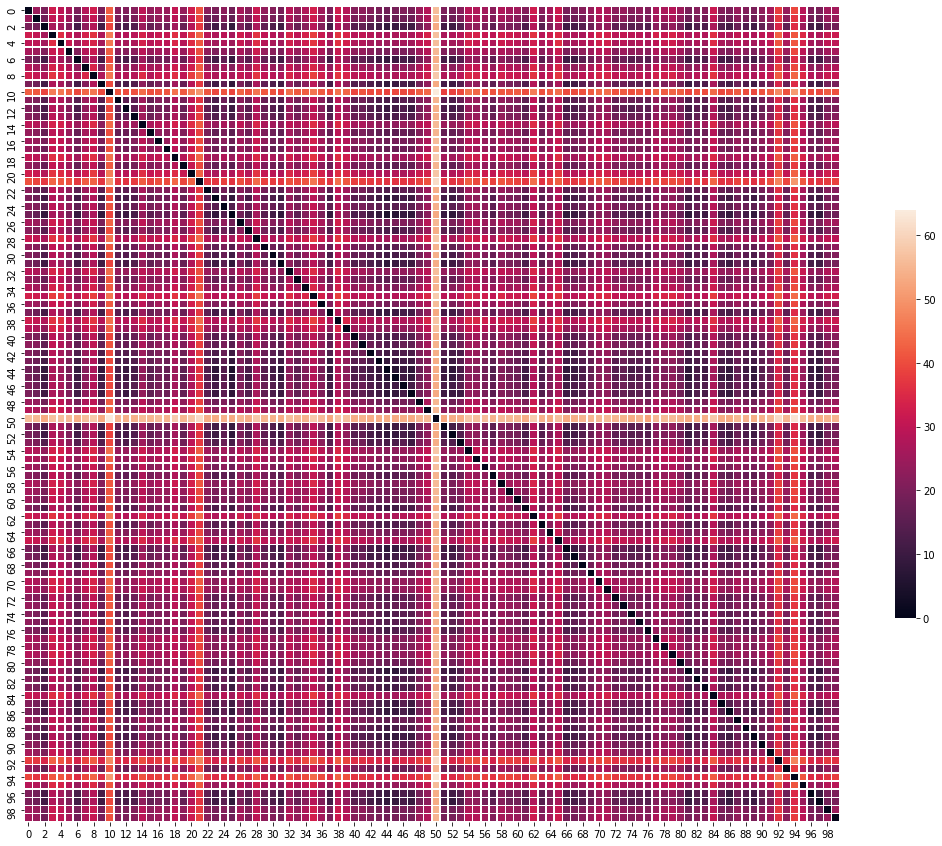

In [250]:
# visualization (index 50 show least similarity with others)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
sns.heatmap(squareform(dist), linewidths=.5, square=True, cbar_kws={"shrink": .5})

### Q6 Run a PCA and graph the first two PCs for the first 100 reviews. Does your graph reflect your findings from the previous exercise?

In [251]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, review.loc[0:99, ["reviewerID"]]], axis = 1)

In [252]:
pd.set_option('display.max_rows', None)
finalDf

,principal component 1,principal component 2,reviewerID
0,-1.560969,-1.085534,AKM1MP6P0OYPR
1,-1.136324,-1.031951,A32N0DAH5YCP93
2,-0.913900,-0.787628,A37I08G1UYJQW5
3,1.944241,-1.115828,A3IC4BR93EUDVG
4,1.553807,-1.379523,AM5HNCAVEV4F7
5,-0.312636,-0.046447,A3NIMPPP06RAFX
6,-1.414073,-0.991021,A22M47FRN5M0G0
7,-0.369272,-0.347559,A3KYNVQ6709Y85
8,0.613800,1.228772,A2REAH5FTY92F8
9,-1.029088,-1.486722,A2KTRWMLL0GII8


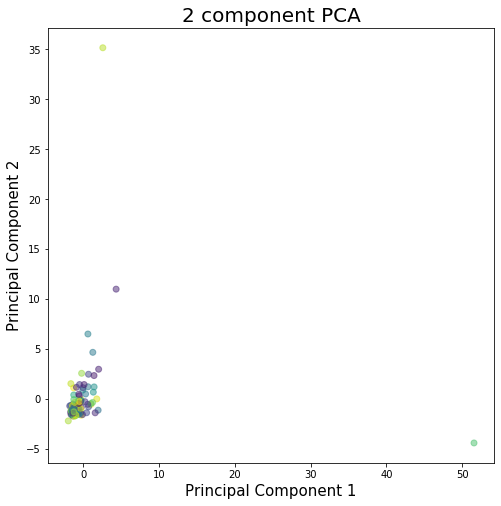

In [253]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

colors = np.random.rand(100)
ax.scatter(finalDf['principal component 1'], 
            finalDf['principal component 2'], 
            c=colors, alpha=0.5)
plt.show()

In [254]:
# outliers (align with the results in Q5: there outliers with index of 10, 21, and 50)
outlier1 = finalDf.loc[finalDf['principal component 1'] > 50 ]
outlier2 = finalDf.loc[finalDf['principal component 2'] > 10 ]
outliers = pd.concat([outlier1, outlier2], axis=0)
outliers

,principal component 1,principal component 2,reviewerID
50,51.551809,-4.397645,AJWQIZ8828FRW
10,2.563332,35.167007,A1K2447Z1ANFMK
21,4.317756,11.000562,A3AJJ6CCF4KYPF


### Q7 Is it possible to use logistic regression to predict the rating (5 levels) of a product? Why may it be advantageous to use a logistic regression to predict the 5-star rating over MNL with 5 categories?

In [256]:
# # instantiate logit models
# from mord import LogisticAT
# model_linear = LinearRegression()
# model_1vR = LogisticRegression(multi_class='ovr',
#     class_weight='balanced')
# model_multi = LogisticRegression(multi_class='multinomial',
#     solver='lbfgs',
#     class_weight='balanced')
# model_ordinal = LogisticAT(alpha=0)  # alpha parameter set to zero to perform no regularisation

In [257]:
# from sklearn.linear_model import LogisticRegression
# from mord import LogisticAT
# from sklearn import metrics
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# logreg = LogisticAT()
# logreg.fit(X_train, y_train)

# y_pred = logreg.predict(X_test)
# print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

In [258]:
# from sklearn import metrics
# cm = metrics.confusion_matrix(y_test, predictions)
# print(cm)

### Q8 Perform a lasso logistic regression and measure the out-of-sample accuracy of your method of choice.

In [259]:
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

In [260]:
### Prepare data for the regression ###
columns = ['reviewerID','asin','helpful_start','helpful_end','reviewText','summary']
df_x = review.loc[:,columns]
df_y = review['overall']

In [261]:
# Define a function for sentiment analysis
def get_polarity (content):
    score = TextBlob(content).sentiment.polarity
    return score

In [262]:
# Data Pre-process
df_x['textPolarity'] = df_x['reviewText'].apply(lambda x:get_polarity(str(x)))
df_x['summaryPolarity'] = df_x['summary'].apply(lambda x:get_polarity(str(x)))
df_x['textLength'] = df_x['reviewText'].apply(lambda x:len(str(x)))
df_x['summaryLength'] = df_x['summary'].apply(lambda x:len(str(x)))
df_x['textPolarity'] = df_x['textPolarity'].apply(lambda x:round(x,1))
df_x['year'] = pd.DatetimeIndex(review["reviewTime"]).year
df_x['month'] = pd.DatetimeIndex(review["reviewTime"]).month
columns = ['helpful_start','helpful_end','textPolarity','summaryPolarity','textLength','summaryLength','year','month']
df_x = df_x.loc[:,columns]
df_x = pd.concat([df_x,doc_df], axis = 1) #doc_df is the doc vectors of bow

In [263]:
df_x.head()

,helpful_start,helpful_end,textPolarity,summaryPolarity,textLength,summaryLength,year,month,use,work,...,seller,older,trip,leav,rather,absolut,contact,build,break,ask
0,1,1,0.5,0.2,222,13,2013,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0.0,0.0,182,10,2013,4,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0.3,0.0,107,9,2011,12,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0.3,0.7,586,42,2011,6,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0.2,0.0,393,24,2014,4,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [264]:
# Create dummy for year and month
factors = ['year', 'month']
for var in factors:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df_x[var], prefix=var, drop_first=True)
    df_x = pd.concat([df_x,cat_list], axis = 1)
    df_x = df_x.drop(var, 1)

# Responsor (multi-class and binomial)
df_y = df_y.apply(int)
df_y_bi=np.where(df_y ==5, 1, 0)

In [265]:
df_x.head()

,helpful_start,helpful_end,textPolarity,summaryPolarity,textLength,summaryLength,use,work,one,great,...,seller,older,trip,leav,rather,absolut,contact,build,break,ask
0,1,1,0.5,0.2,222,13,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0.0,0.0,182,10,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0.3,0.0,107,9,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0.3,0.7,586,42,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0.2,0.0,393,24,1.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [266]:
### Lasso Logistic Regression - Binomial ###
df_x = StandardScaler().fit_transform(df_x.iloc[0:10000,])
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y[0:10000], test_size=0.3, random_state=123)
y_train=np.where(y_train ==5, 1, 0) # change the y_train to 0/1 where 1 is overall == 5

lasso_log_m = LogisticRegressionCV(Cs=10, fit_intercept=True, cv=3, dual=False, 
                           penalty='l1', scoring=None, solver='saga', tol=0.0001, 
                           max_iter=200,random_state=123,multi_class='ovr') 

lasso_log_m.fit(X_train,y_train)
lasso_predictions_m = lasso_log_m.predict_proba(X_test)
# Extract the probablity of y == 1
lasso_m_prob = list()
for li in lasso_predictions_m:
    lasso_m_prob.append(li[1])
# Transform the probablity of y==1 to the 5-level measurement
for i in range(len(lasso_m_prob)):
    if lasso_m_prob[i]<0.2:
        lasso_m_prob[i] = 1
    elif lasso_m_prob[i]>=0.2 and lasso_m_prob[i]<0.4:
        lasso_m_prob[i] = 2
    elif lasso_m_prob[i]>=0.4 and lasso_m_prob[i]<0.6:
        lasso_m_prob[i] = 3
    elif lasso_m_prob[i]>=0.6 and lasso_m_prob[i]<0.8:
        lasso_m_prob[i] = 4
    else:
        lasso_m_prob[i] = 5
print(classification_report(y_test, lasso_m_prob)) 

/Users/RiaLiu/.pyenv/versions/3.8.1/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/RiaLiu/.pyenv/versions/3.8.1/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/RiaLiu/.pyenv/versions/3.8.1/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/RiaLiu/.pyenv/versions/3.8.1/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/RiaLiu/.pyenv/versions/3.8.1/lib/python3.

              precision    recall  f1-score   support

           1       0.53      0.61      0.56       426
           2       0.09      0.27      0.14       146
           3       0.09      0.23      0.13       207
           4       0.20      0.29      0.24       470
           5       0.88      0.46      0.61      1751

    accuracy                           0.43      3000
   macro avg       0.36      0.37      0.34      3000
weighted avg       0.63      0.43      0.49      3000



/Users/RiaLiu/.pyenv/versions/3.8.1/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [267]:
train_score=lasso_log_m.score(X_train,y_train)
test_score=lasso_log_m.score(X_test,y_test)
r2_lasso = r2_score(y_test, lasso_m_prob)

print(r2_lasso)
print("Out-of-sample accuracy: ", test_score)

0.1522598770220026
Out-of-sample accuracy:  0.009


In [269]:
### Lasso Logistic Regression - Multinomial ###
# X_train, X_test, y_train, y_test = train_test_split(df_x, df_y[0:10000], test_size=0.3, random_state=123)

# lasso_log = LogisticRegressionCV(Cs=10, fit_intercept=True, cv=5, dual=False, 
#                            penalty='l1', scoring=None, solver='saga', tol=0.0001, 
#                            max_iter=100,random_state=123,multi_class='multinomial')

# lasso_log.fit(X_train,y_train)
# lasso_predictions = lasso_log.predict(X_test)
# print(classification_report(y_test, lasso_predictions))

### Q9 Implement a method to aggregate reviews by product. Can you use any of the other columns to help with aggregation? Explain why or why not. Please clearly explain your method.

In [46]:
columns = ['helpful_start', 'helpful_end']
df_product = review.loc[:,columns]

In [56]:
# calcualte helfulness ratio
df_product['helpful_ratio'] = (df_product['helpful_start']/df_product['helpful_end']).fillna(0)
df_product['helpful_ratio'] = np.exp(df_product['helpful_ratio'])
df_product.head()

,helpful_start,helpful_end,helpful_ratio
0,1,1,2.718282
1,0,0,1.000000
2,0,0,1.000000
3,0,0,1.000000
4,0,0,1.000000


In [57]:
# use the helpful ratio to weight each review
BOW_weight = doc_df.multiply(df_product['helpful_ratio'], axis="index")
BOW_weight['asin'] = review.loc[:,'asin']

In [58]:
# sum the weighted BOW by products
Product_BOW = BOW_weight.groupby('asin').sum()
Product_BOW.head()

,use,work,one,great,would,good,get,like,product,camera,...,seller,older,trip,leav,rather,absolut,contact,build,break,ask
asin,,,,,,,,,,,,,,,,,,,,,
0132793040,0.000000,0.000000,0.000000,5.436564,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
B001F9DJOO,166.476873,446.414912,249.787205,126.646271,120.370287,100.825409,135.530414,76.183953,193.537600,0.000000,...,15.835282,9.0,7.0,8.384298,9.718282,7.718282,8.0,3.0,9.718282,7.718282
B001F9FK50,0.000000,0.000000,0.000000,2.718282,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
B001F9GLB2,8.154845,0.000000,10.873127,8.117157,6.117157,5.117157,5.436564,2.718282,0.000000,68.360013,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
B001F9GUAE,0.000000,4.718282,2.000000,1.000000,0.000000,0.000000,0.000000,2.718282,3.718282,1.000000,...,0.000000,0.0,0.0,0.000000,0.000000,2.718282,0.0,0.0,0.000000,0.000000


### Q10 Establish a method for measuring the distance between different products.
***Re:Q10:  please write a method that takes any two products (ASINs) as input and calculates their mutual distance.
Of course, it would be nice if you could test your method on 10 ASIN pairs...***

In [59]:
# Step 1: Run PCA to shrink the 500 dimensions to 2 dimentsions
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
Product_BOW_scaled = StandardScaler().fit_transform(Product_BOW)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(Product_BOW_scaled)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['PC1', 'PC2'])

In [61]:
Product_BOW = Product_BOW.reset_index()
finalDf = pd.concat([principalDf, Product_BOW.loc[:, ['asin']]], axis = 1)
finalDf.head()

,PC1,PC2,asin
0,-3.524202,0.062102,0132793040
1,35.527207,5.057178,B001F9DJOO
2,-3.481919,0.058768,B001F9FK50
3,-1.304477,0.157064,B001F9GLB2
4,-3.063679,0.160112,B001F9GUAE


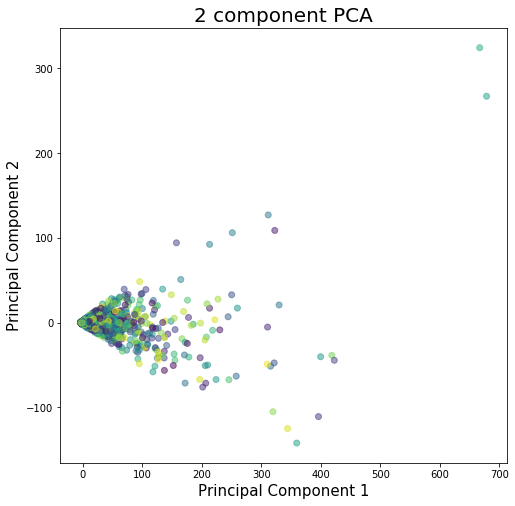

In [55]:
# visualize the distribution of all products on two dimensions
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

colors = np.random.rand(25835)
ax.scatter(finalDf['PC1'], 
            finalDf['PC2'], 
            c=colors, alpha=0.5)
plt.show()

In [33]:
# Step 2: Calculate the distance for each pari of products
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler
scale_items = StandardScaler().fit_transform(finalDf[['PC1','PC2']])

dist = pdist(scale_items, 'euclidean')
prod_dist = pd.DataFrame(squareform(dist))

In [359]:
prod_dist.shape

(25835, 25835)

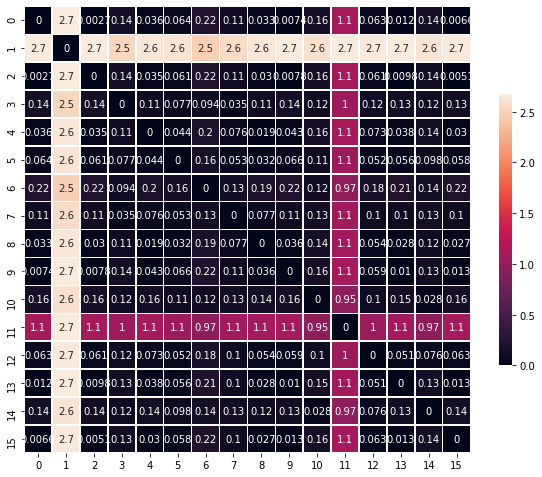

In [45]:
# visualize the distance for the first 15 products
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(prod_dist.loc[0:15, 0:15], annot=True, linewidths=.5,
            square=True,cbar_kws={"shrink": .5})

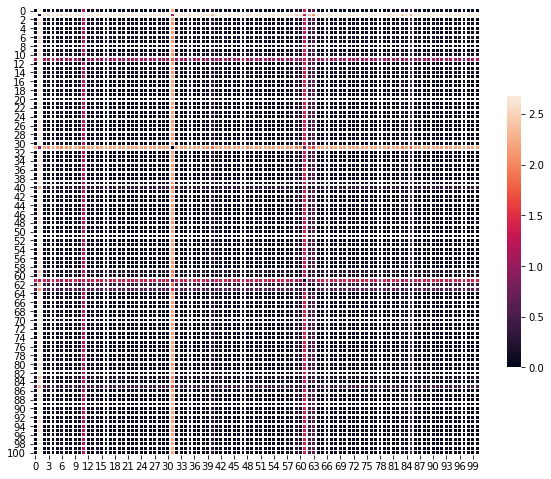

In [44]:
# visualize the distance for the first 100 products
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(prod_dist.loc[0:100, 0:100], annot=False, linewidths=.5,
            square=True,cbar_kws={"shrink": .5})